In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the dataframe
df = pd.read_csv("data\dataframe.csv")

# Drop any rows with missing values
df = df.dropna()

# Split the data into input features (X) and target variable (y)
X = df.drop("y", axis=1).values
y = df["y"].values

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import joblib

# Define the scoring metric
scorer = make_scorer(f1_score)

model = KNeighborsClassifier()

grid_space={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean','manhattan']
            }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring="f1_micro",verbose=10)

# Enable verbose logging using joblib
#joblib.parallel_backend('threading')

model_grid = grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 2/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 3/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 1/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 2/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 3/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 1/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 2/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 2/3; 2/36] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.870 total time=   0.3s
[CV 3/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 3/3; 2/36] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.865 total time=   0.5s
[CV 1

In [13]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score is: 0.8721560130010834


In [23]:
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.91      0.92      0.92       433
          15       0.81      0.83      0.82       220
          16       0.97      0.94      0.96       115
          21       0.67      0.73      0.70        48
          33       0.89      0.90      0.90       385
          34       0.00      0.00      0.00         3
          39       0.78      0.88      0.82         8
          56       0.91      0.95      0.93       337
          68       0.82      0.87      0.84       300
          95       0.94      0.99      0.96       140
        1000       0.88      0.79      0.83       379
        1001       0.88      0.83      0.85       361

    accuracy                           0.88      2729
   macro avg       0.79      0.80      0.79      2729
weighted avg       0.88      0.88      0.88      2729



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


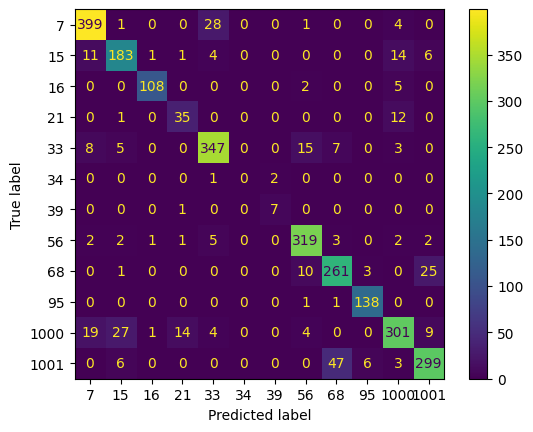

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [28]:
#Verification with new unseen data
# Read the dataframe
df_verif = pd.read_csv("data\lzac.csv")

# Drop any rows with missing values
df_verif = df_verif.dropna()

# Split the data into input features (X) and target variable (y)
X_verif = df_verif.drop("y", axis=1).values
y_verif = df_verif["y"].values

In [29]:
y_pred_verif = knn.predict(X_verif)
print(classification_report(y_verif, y_pred_verif))

              precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         7
          55       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         2
          68       0.00      0.00      0.00       105
        1000       0.00      0.00      0.00         0
        1001       0.35      0.34      0.35        64

    accuracy                           0.12       179
   macro avg       0.04      0.04      0.04       179
weighted avg       0.13      0.12      0.12       179



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\